In [299]:
import matplotlib as mpl
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit_ionq_provider import IonQProvider 
import math

circ = QuantumCircuit(1)
sim_backend = Aer.get_backend('qasm_simulator')



In [172]:
def get_token():
    %reload_ext dotenv
    %dotenv
    import os
    TOKEN = os.getenv('API_KEY')
    #Call provider and set token value
    provider = IonQProvider(token=TOKEN)

In [293]:
def circuit(sim=False):
    # Create a bell state circuit.
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    qc.t(0)
    #qc.h(0)
    #qc.p(3.14,0)
    #qc.rx(3.14, 0)
    qc.y(0)
    #qc.ry(3.14/2,0)
    qc.h(0)
    if(not sim):
        qc.measure([0], [0])

    # Show the circuit:
    return qc

In [294]:
def get_result(circuit, shots):
    qpu_backend = provider.get_backend("ionq_qpu")
    job = qpu_backend.run(circuit, shots=shots)
    local_result = job.result()
    return local_result

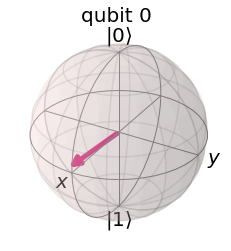

In [295]:
state = Statevector.from_instruction(circuit(True))
plot_bloch_multivector(state)

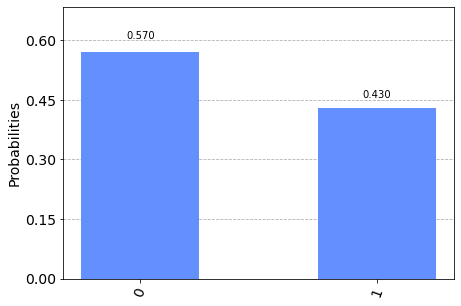

In [196]:
    from qiskit.visualization import plot_histogram
    result = get_result(circuit(), 100)
    plot_histogram(result.get_counts())

In [41]:
s,rx/2,t,z,y,p/4,p/2,p

47


Statevector([0.5      +0.j, 0.8660254+0.j],
            dims=(2,))


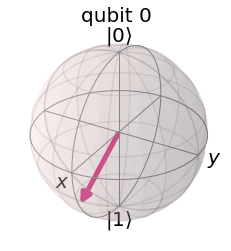

In [301]:
com = QuantumCircuit(1, 1)
com.initialize([math.sqrt(0.25), math.sqrt(0.75)], 0)
state = Statevector.from_instruction(com)
print(state)
plot_bloch_multivector(state)        